In [1]:
import pandas as pd

d1 = pd.read_csv('dataset1.csv')
d2 =  pd.read_csv('dataset2.csv')

In [2]:
d1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,4/05/2018 4:18,2.000000,rat,4/05/2018 4:14,4/05/2018 4:30,224,1,0,5,3/05/2018 19:22,8.933333,1
903,4/05/2018 4:18,1.000000,fast,4/05/2018 4:14,4/05/2018 4:30,275,0,1,5,3/05/2018 19:22,8.947500,1
904,4/05/2018 4:19,22.000000,pick,4/05/2018 4:14,4/05/2018 4:30,310,0,1,5,3/05/2018 19:22,8.957222,1
905,3/05/2018 23:51,2.000000,fast,3/05/2018 23:46,3/05/2018 23:52,339,0,1,5,3/05/2018 19:22,4.498889,1


In [3]:
d2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


## Basic Data Understanding

In [4]:
def Overview(df, name):
    overview = pd.DataFrame({
        'column': df.columns,
        'dtype': [str(df[c].dtype) for c in df.columns],
        'missing_count': [df[c].isna().sum() for c in df.columns],
        'unique_values': [df[c].nunique(dropna=True) for c in df.columns]
    })
    overview.insert(0, 'dataset', name)
    return overview

ov1 = Overview(d1, 'dataset1')
ov2 = Overview(d2, 'dataset2')

In [5]:
ov1

,dataset,column,dtype,missing_count,unique_values
0,dataset1,start_time,object,0,628
1,dataset1,bat_landing_to_food,float64,0,204
2,dataset1,habit,object,41,81
3,dataset1,rat_period_start,object,0,268
4,dataset1,rat_period_end,object,0,268
5,dataset1,seconds_after_rat_arrival,int64,0,501
6,dataset1,risk,int64,0,2
7,dataset1,reward,int64,0,2
8,dataset1,month,int64,0,6
9,dataset1,sunset_time,object,0,65


In [6]:
ov2

,dataset,column,dtype,missing_count,unique_values
0,dataset2,time,object,0,2123
1,dataset2,month,int64,0,7
2,dataset2,hours_after_sunset,float64,0,32
3,dataset2,bat_landing_number,int64,0,119
4,dataset2,food_availability,float64,0,600
5,dataset2,rat_minutes,float64,0,401
6,dataset2,rat_arrival_number,int64,0,10


In [7]:
d1.describe()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,0.495039,0.533627,3.800441,5.531863,0.833517
std,27.644410,240.974918,0.500251,0.499143,1.199190,2.414146,0.372719
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


In [8]:
d2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


In [9]:
s = d1['habit'].value_counts()

In [10]:
print(s)

habit
fast                                                245
rat                                                 221
pick                                                139
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 81, dtype: int64


In [11]:
j = 0
for i in range(len(d1)):
    if d1['habit'].iloc[i] == 'rat' and d1['risk'].iloc[i] != 1:
        print()
        j = 1
    
if j == 0:
    print('Rat always equals risk')

Rat always equals risk


In [12]:
d1['risk'].value_counts()

risk
0    458
1    449
Name: count, dtype: int64

## Mean of bat landing to food when risk 0 and risk 1

In [13]:
mean = d1.groupby('risk')['bat_landing_to_food'].mean()

In [14]:
mean

risk
0     7.124469
1    16.393777
Name: bat_landing_to_food, dtype: float64

## STDev Risk 0 and Risk 1

In [15]:
stf = d1.groupby('risk')['bat_landing_to_food'].std()

In [16]:
stf

risk
0    20.524740
1    32.745596
Name: bat_landing_to_food, dtype: float64

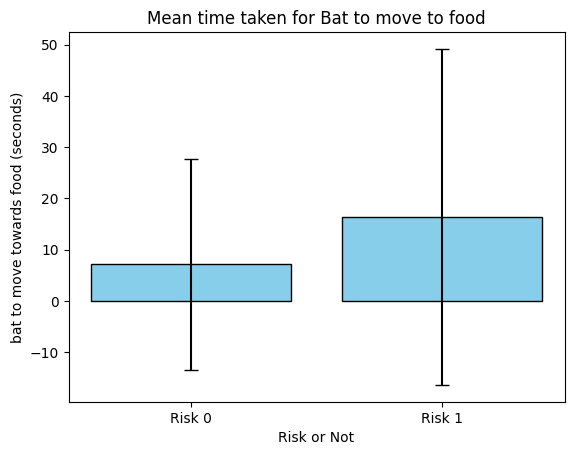

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Risk 0', 'Risk 1',]
values = [mean[0],mean[1]]
std_devs = [stf[0], stf[1]]  # standard deviations for each category

plt.bar(categories, values, yerr=std_devs, color='skyblue', edgecolor='black', capsize=5)

# Add title and labels
plt.title('Mean time taken for Bat to move to food')
plt.xlabel('Risk or Not')
plt.ylabel('bat to move towards food (seconds)')

# Show the plot
plt.show()


## Levene Test (Variance Measurement)

In [18]:
from scipy.stats import levene

group0 = d1[d1['risk']==0]['bat_landing_to_food']
group1 = d1[d1['risk']==1]['bat_landing_to_food']

stat, p = levene(group0, group1)
print('Levene test statistic = %.3f, p = %.3f' % (stat, p))
print('Variances are similar')

Levene test statistic = 20.073, p = 0.000
Variances are similar


## Shapiro-Wilk Test (Normality Test)

In [19]:
from scipy.stats import shapiro

group0 = d1[d1['risk']==0]['bat_landing_to_food']
stat, p = shapiro(group0)
print('Shapiro-Wilk test statistic=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk test statistic=0.289, p=0.000


In [20]:
from scipy.stats import shapiro

group0 = d1[d1['risk']==1]['bat_landing_to_food']
stat, p = shapiro(group0)
print('Shapiro-Wilk test statistic=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk test statistic=0.444, p=0.000


## Due to Shapiro-Wilk shifter to Mann-Whitney instead of T-Test

In [21]:
from scipy.stats import mannwhitneyu

group0 = d1[d1['risk']==0]['bat_landing_to_food']
group1 = d1[d1['risk']==1]['bat_landing_to_food']

stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
print('Mann-Whitney U test statistic=%.3f, p=%.3f' % (stat, p))


Mann-Whitney U test statistic=68002.000, p=0.000


In [22]:
print("We first checked assumptions. Levene’s test (F = 20.073, p < 0.001) indicated unequal variances between the two risk groups. The Shapiro–Wilk test (W = 0.289, p < 0.001) showed a violation of normality, so the assumptions for a standard independent t-test were not met. Because of this, we used the non-parametric Mann–Whitney U test, which does not assume normality or equal variances. The Mann–Whitney test (U = 68,002, p < 0.001) indicated a significant difference in the time taken by bats to move toward food between risk = 0 and risk = 1. Bats took substantially longer to approach food when risk were present, suggesting that bats perceive rats as a potential threat or disturbance, altering their foraging behaviour. These results support the idea that rats affect bat behaviour, potentially through increased vigilance (more time when in risk) and sometimes avoidance behaviour (risk 0 similar to the number of risk 1)")


We first checked assumptions. Levene’s test (F = 20.073, p < 0.001) indicated unequal variances between the two risk groups. The Shapiro–Wilk test (W = 0.289, p < 0.001) showed a violation of normality, so the assumptions for a standard independent t-test were not met. Because of this, we used the non-parametric Mann–Whitney U test, which does not assume normality or equal variances. The Mann–Whitney test (U = 68,002, p < 0.001) indicated a significant difference in the time taken by bats to move toward food between risk = 0 and risk = 1. Bats took substantially longer to approach food when risk were present, suggesting that bats perceive rats as a potential threat or disturbance, altering their foraging behaviour. These results support the idea that rats affect bat behaviour, potentially through increased vigilance (more time when in risk) and sometimes avoidance behaviour (risk 0 similar to the number of risk 1)


## Dataset 2

In [23]:
d2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [24]:
d2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


## Scatter Plot

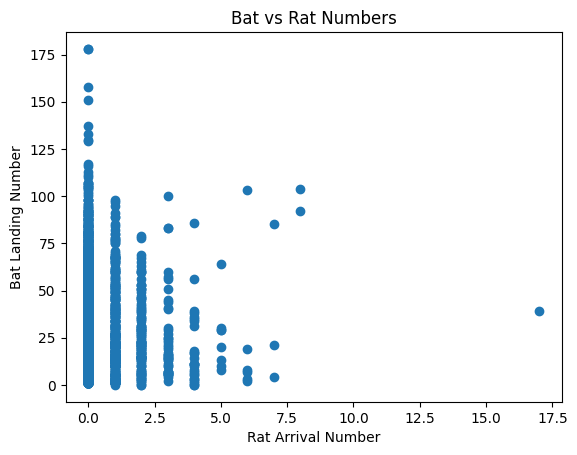

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = d2['bat_landing_number'].to_list()
y = d2['rat_arrival_number'].to_list()

plt.scatter(y, x)

plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.title("Bat vs Rat Numbers")

plt.show()

In [26]:
print("Bat landing number decreases with Rat Arrival Number")

Bat landing number decreases with Rat Arrival Number


In [27]:
from scipy.stats import pearsonr

x = d2['bat_landing_number'].to_list()
y = d2['rat_arrival_number'].to_list()
correlation_coefficient, p_value = pearsonr(x, y)
print(correlation_coefficient)
print(p_value)
print("shows a weak negative correlation")

-0.07353632546043397
0.0006967431337291328
shows a weak negative correlation


In [28]:
import statsmodels.formula.api as smf
import pandas as pd

# assume d2 is your dataset2 DataFrame

for col in ['bat_landing_number','food_availability','rat_minutes','rat_arrival_number','hours_after_sunset']:
    d2[col] = pd.to_numeric(d2[col], errors='coerce')

df = d2.dropna(subset=['bat_landing_number','rat_arrival_number','food_availability'])

model1 = smf.ols('bat_landing_number ~ rat_arrival_number + hours_after_sunset', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     bat_landing_number   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     26.04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.72e-12
Time:                        04:43:24   Log-Likelihood:                -9871.4
No. Observations:                2123   AIC:                         1.975e+04
Df Residuals:                    2120   BIC:                         1.977e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             37.2998      0

In [29]:
# model 2: does food availability depend on rats & bats?
model2 = smf.ols('food_availability ~ rat_arrival_number + bat_landing_number', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      food_availability   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.50
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           4.03e-06
Time:                        04:43:26   Log-Likelihood:                -3418.8
No. Observations:                2123   AIC:                             6844.
Df Residuals:                    2120   BIC:                             6860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.3028      0

In [30]:
print("Bat landings were considerably decreased by rat arrivals (coef = -1.55, p = 0.004), suggesting that bats respond to rodents by changing their feeding habits. Bat landings were positively correlated with food (coef = 0.0049, p < 0.001), indicating that rats indirectly affect food access by changing bat activity, even though their presence did not directly increase food availability (p = 0.229).")

Bat landings were considerably decreased by rat arrivals (coef = -1.55, p = 0.004), suggesting that bats respond to rodents by changing their feeding habits. Bat landings were positively correlated with food (coef = 0.0049, p < 0.001), indicating that rats indirectly affect food access by changing bat activity, even though their presence did not directly increase food availability (p = 0.229).
